In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
!unzip "/content/office.zip" # upload ZIP from computer
# !unzip "/content/drive/My Drive/office.zip" --> NOT UNZIPING FULL SET

Archive:  /content/office.zip
   creating: office/
   creating: office/webcam/
   creating: office/dslr/
   creating: office/amazon/
   creating: office/webcam/images/
   creating: office/dslr/images/
   creating: office/amazon/images/
   creating: office/webcam/images/trash_can/
  inflating: office/webcam/images/trash_can/frame_0021.jpg  
  inflating: office/webcam/images/trash_can/frame_0020.jpg  
  inflating: office/webcam/images/trash_can/frame_0019.jpg  
  inflating: office/webcam/images/trash_can/frame_0018.jpg  
  inflating: office/webcam/images/trash_can/frame_0017.jpg  
  inflating: office/webcam/images/trash_can/frame_0016.jpg  
  inflating: office/webcam/images/trash_can/frame_0015.jpg  
  inflating: office/webcam/images/trash_can/frame_0014.jpg  
  inflating: office/webcam/images/trash_can/frame_0013.jpg  
  inflating: office/webcam/images/trash_can/frame_0012.jpg  
  inflating: office/webcam/images/trash_can/frame_0011.jpg  
  inflating: office/webcam/images/trash_can/fram

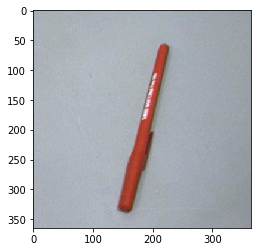

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# verify image has been uploaded correctly to colab
img = cv2.imread("/content/office/webcam/images/pen/frame_0002.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [5]:
import torch
import os

print(">>> Colab CUDA info <<<")
print(torch.cuda.current_device())
print(torch.cuda.device(0))
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available())

>>> Colab CUDA info <<<
0
1
Tesla K80
True


In [32]:
# train DeepCORAL w/ domain adaptation
!python /content/main.py --epochs 100 --batch_size_source 128 --batch_size_target 128 --name_source amazon --name_target webcam --adapt_domain

creating source/target dataloaders...
source data: amazon
target data: webcam
using cuda...
loading pre-trained AlexNet...
loaded model correctly...
model type: <class 'model.DeepCORAL'>
adapt domain: True
running training for 100 epochs...
CUDA: True
compute covariance bath size n: 128
compute covariance bath size n: 128
Train Epoch:  1 [ 1/ 6]	Lambda value: 0.0100, Classification loss: 3.446163, CORAL loss: 0.000009, Total_Loss: 3.446163
CUDA: True
compute covariance bath size n: 128
compute covariance bath size n: 128
Train Epoch:  1 [ 2/ 6]	Lambda value: 0.0100, Classification loss: 3.013056, CORAL loss: 0.000015, Total_Loss: 3.013056
CUDA: True
compute covariance bath size n: 128
compute covariance bath size n: 128
Train Epoch:  1 [ 3/ 6]	Lambda value: 0.0100, Classification loss: 2.715696, CORAL loss: 0.000094, Total_Loss: 2.715697
CUDA: True
compute covariance bath size n: 128
compute covariance bath size n: 128
Train Epoch:  1 [ 4/ 6]	Lambda value: 0.0100, Classification loss: 

In [33]:
# train DeepCORAL w/o domain adaptation
!python /content/main.py --epochs 100 --batch_size_source 128 --batch_size_target 128 --name_source amazon --name_target webcam

creating source/target dataloaders...
source data: amazon
target data: webcam
using cuda...
loading pre-trained AlexNet...
loaded model correctly...
model type: <class 'model.DeepCORAL'>
adapt domain: False
running training for 100 epochs...
CUDA: True
compute covariance bath size n: 128
compute covariance bath size n: 128
Train Epoch:  1 [ 1/ 6]	Lambda value: 0.0000, Classification loss: 3.423044, CORAL loss: 0.000007, Total_Loss: 3.423044
CUDA: True
compute covariance bath size n: 128
compute covariance bath size n: 128
Train Epoch:  1 [ 2/ 6]	Lambda value: 0.0000, Classification loss: 3.142355, CORAL loss: 0.000011, Total_Loss: 3.142355
CUDA: True
compute covariance bath size n: 128
compute covariance bath size n: 128
Train Epoch:  1 [ 3/ 6]	Lambda value: 0.0000, Classification loss: 2.623153, CORAL loss: 0.000152, Total_Loss: 2.623153
CUDA: True
compute covariance bath size n: 128
compute covariance bath size n: 128
Train Epoch:  1 [ 4/ 6]	Lambda value: 0.0000, Classification loss:

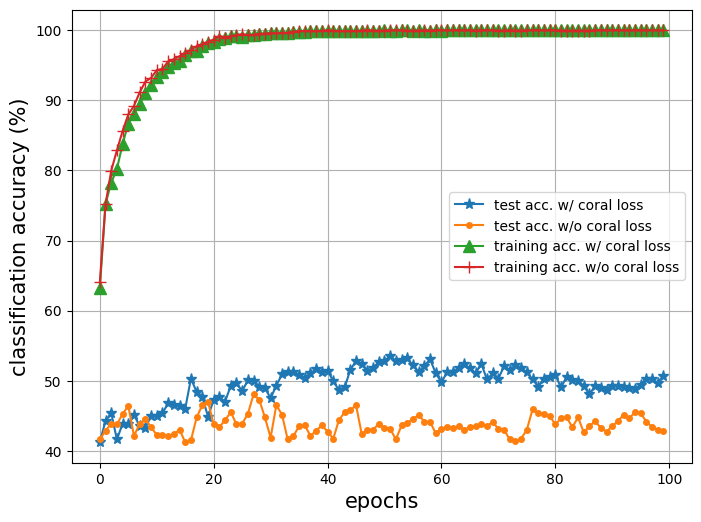

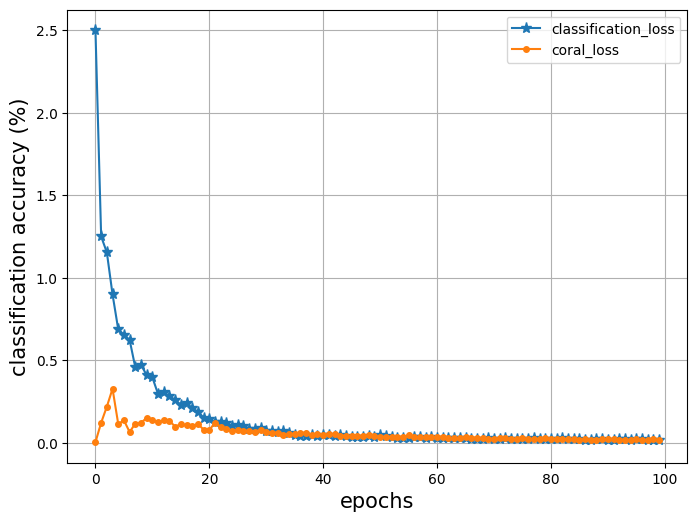

In [34]:
import torch
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pickle


def plot_loss_acc():
  pass

# load dictionaries with log information
path_adapt_log = ["/content/adaptation_training_statistic.pkl",
                  "/content/adaptation_testing_s_statistic.pkl",
                  "/content/adaptation_testing_t_statistic.pkl"]

path_no_adapt_log = ["/content/no_adaptation_training_statistic.pkl",
                     "/content/no_adaptation_testing_s_statistic.pkl",
                     "/content/no_adaptation_testing_t_statistic.pkl"]

adapt_training_dict = pickle.load(open(path_adapt_log[0], 'rb'))
adapt_testing_source_dict = pickle.load(open(path_adapt_log[1], 'rb'))
adapt_testing_target_dict = pickle.load(open(path_adapt_log[2], 'rb'))

no_adapt_training_dict = pickle.load(open(path_no_adapt_log[0], 'rb'))
no_adapt_testing_source_dict = pickle.load(open(path_no_adapt_log[1], 'rb'))
no_adapt_testing_target_dict = pickle.load(open(path_no_adapt_log[2], 'rb'))

adaptation = {
    "classification_loss": [],
    "coral_loss": [],
    "source_accuracy": [],
    "target_accuracy": []
}

no_adaptation = {
    "source_accuracy": [],
    "target_accuracy": []
}

# get average coral and classification loss for steps in each epoch
for epoch_idx in range(len(adapt_training_dict)): # epoch
  coral_loss = 0
  class_loss = 0

  for step_idx in range(len(adapt_training_dict[epoch_idx])):
    coral_loss += adapt_training_dict[epoch_idx][step_idx]["coral_loss"]
    class_loss += adapt_training_dict[epoch_idx][step_idx]["classification_loss"]

  # store average losses and accuracies in adaptation dictionary
  adaptation["classification_loss"].append(class_loss/len(adapt_training_dict[epoch_idx]))
  adaptation["coral_loss"].append(coral_loss/len(adapt_training_dict[epoch_idx]))
  adaptation["source_accuracy"].append(adapt_testing_source_dict[epoch_idx]["accuracy %"])
  adaptation["target_accuracy"].append(adapt_testing_target_dict[epoch_idx]["accuracy %"])

  # store accuracies in no-adaptation dictionary
  no_adaptation["source_accuracy"].append(no_adapt_testing_source_dict[epoch_idx]["accuracy %"])
  no_adaptation["target_accuracy"].append(no_adapt_testing_target_dict[epoch_idx]["accuracy %"])

# plot accuracies for test data in source and target domains
fig=plt.figure(figsize=(8, 6), dpi=100)
fig.show()

plt.xlabel("epochs", fontsize=15)
plt.ylabel("classification accuracy (%)", fontsize=15)

plt.plot(adaptation['target_accuracy'], label="test acc. w/ coral loss", marker='*', markersize=8)
plt.plot(no_adaptation['target_accuracy'], label="test acc. w/o coral loss", marker='.', markersize=8)

plt.plot(adaptation['source_accuracy'], label="training acc. w/ coral loss", marker='^', markersize=8)
plt.plot(no_adaptation['source_accuracy'], label="training acc. w/o coral loss", marker='+', markersize=8)

plt.legend(loc="best")
plt.grid()
plt.show()
fig.savefig("/content/webcam_to_amazon_test_train_accuracies.jpg")

# plot accuracies for test data in source and target domains
fig=plt.figure(figsize=(8, 6), dpi=100)
fig.show()

plt.xlabel("epochs", fontsize=15)
plt.ylabel("classification accuracy (%)", fontsize=15)

plt.plot(adaptation["classification_loss"], label="classification_loss", marker='*', markersize=8)
plt.plot(adaptation["coral_loss"], label="coral_loss", marker='.', markersize=8)

plt.legend(loc="best")
plt.grid()
plt.show()
fig.savefig("/content/webcam_to_amazon_train_losses.jpg")